In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# full=pd.read_csv("full.csv", index_col=0)
full_w_outs=pd.read_csv("full_w_outs_pin.csv", index_col=0)

In [5]:

cols_base=['opponent', 'team', 'date', 'time', 'round', 'day', 'venue', 'result', 'gf', 'ga','venue_code','pAvgH']

cols_diffs=['goalie_diff', 'defs_diff', 'mids_diff', 'atks_diff', 'offdeff_diff',
       'intensity_diff', 'dirspeed_diff', 'deads_diff', 'press_diff',
       'contra_diff', 'buildup_diff', 'progress_diff', 'carr_diff',
       'wings_diff', 'agresive_diff', 'deferror_diff', 'offsucc_diff']


cols_sel=cols_diffs + ['venue_code',
                     #   'points_rolling'
                       ]
# 7324 7368
# cols_sel.remove('offsucc_diff')
# # 736
# cols_sel.remove('progress_diff')
# cols_sel.remove('atks_diff')
# cols_sel.remove('mids_diff')
# 723 741


# predictors = ["venue_code", "opp_code", "hour", "day_code"]

X_base=full_w_outs[cols_sel]
feature_names=list(X_base.columns)

In [6]:
from sklearn.model_selection import train_test_split
X=X_base
y=full_w_outs['pAvgH'].values
# y=full_w_outs['post_reg_form3'].values
# Reshape y if only one col
# y_train_1d= np.ravel(y_train) 
y = y.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
splited = X_train, X_test, y_train, y_test

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as MSE

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV


def make_predictions_reg(data,reg,feature_names,scale=False,grid_params=None,plot_imp=False):
    X_train, X_test, y_train, y_test = data

    if scale:
        # Setup the pipeline steps: steps
        scaler = StandardScaler()
        model = make_pipeline(scaler,reg)
        print(model.steps)
    else:
        model = reg

    if grid_params:
        # Instantiate the GridSearchCV object: cv
        model = GridSearchCV(model, grid_params)

    # Fit the model
    model.fit(X_train, y_train)
    
    # error = accuracy_score(y_test, y_pred)

    try:
        score = model.best_score_
        model = model.best_estimator_
    except:
        pass

    try:
        hparams = model.best_params_
    except:
        hparams = None

    # Predict on the test data: y_pred
    y_pred = model.predict(X_test)

    # Compute and print the coefficients
    try:
        reg_step=model.steps[-1][1].coef_
        if reg_step.shape[0]>1:
            coefs=reg_step
        else:
            coefs=reg_step[0]
    except:
        try:
            coefs=model.coef_[0]
        except:
            pass
    try:
        print(coefs)

        # Plot the coefficients
        plt.plot(range(len(feature_names)), coefs)
        plt.xticks(range(len(feature_names)), feature_names, rotation=60)
        plt.margins(0.02)
        plt.show()
    except:
        coefs=None
    try:
        imps=model.feature_importances_
    except:
        imps=None


    # Compute 5-fold cross-validation scores: cv_scores
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)

    # Print the 5-fold cross-validation scores
    print(cv_scores)
    print(np.mean(cv_scores))

    # Compute and print R^2 on holdout
    print('R^2 on holdout'),
    score=model.score(X_test, y_test)
    print(score)

    # Evaluate the test set RMSE
    rmse_test = MSE(y_test, y_pred)**(1/2)
    # Print rmse_test
    print('Test set RMSE: {:.3f}'.format(rmse_test))

    # plot_importances
    if plot_imp:
        plot_importances(feature_names,imps,coefs)

    return model,(feature_names),(score)

def plot_importances(feature_names,imps,coefs):
    if imps is not None:
        data=imps
    else:
        data=coefs
    
    # Create a pd.Series of features importances
    importances = pd.Series(data=data, index=feature_names)

    # Sort importances
    importances_sorted = importances.sort_values()

    # Draw a horizontal barplot of importances_sorted
    importances_sorted.plot(kind='barh', color='lightgreen')
    plt.title('Features Importances')
    plt.show()

    return importances_sorted
    

def export_model(clf,filename):
    from joblib import dump
    dump(clf, f'{filename}.joblib') 
    # import pickle
    # s = pickle.dumps(clf)
    # clf2 = pickle.loads(s)

def load_model(clf,fpath):
    from joblib import  load
    clf = load(fpath)

def append_preds(base_df,df_w_features,feature_names,model):
    
    # rest=[x for x in df.columns if not x in feature_names]
    fin=base_df.copy()
    pred=model.predict(df_w_features[feature_names])    
    fin['y_pred']=pred

    return fin

[ 0.00528014  0.1050051   0.10120357  0.05263551  0.14066294  0.03171476
 -0.13416493  0.01135044 -0.00551865  0.01596001 -0.00757601 -0.04520653
 -0.04942105 -0.00657402 -0.00312289  0.00206536 -0.04363468  0.11259854]


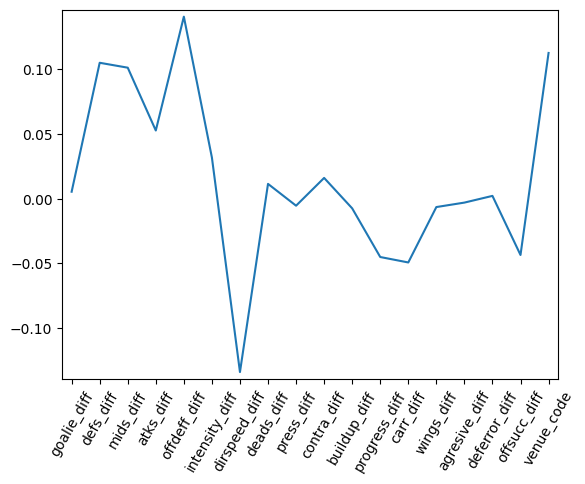

[0.79811383 0.78210644 0.77165844 0.76562228 0.78567325]
0.7806348516821535
R^2 on holdout
0.7723837192278835
Test set RMSE: 0.094


In [193]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

model,pred,info=make_predictions_reg(splited,reg,feature_names,scale=False,grid_params=None)

[ 0.00528014  0.1050051   0.10120357  0.05263551  0.14066294  0.03171476
 -0.13416493  0.01135044 -0.00551865  0.01596001 -0.00757601 -0.04520653
 -0.04942105 -0.00657402 -0.00312289  0.00206536 -0.04363468  0.11259854]


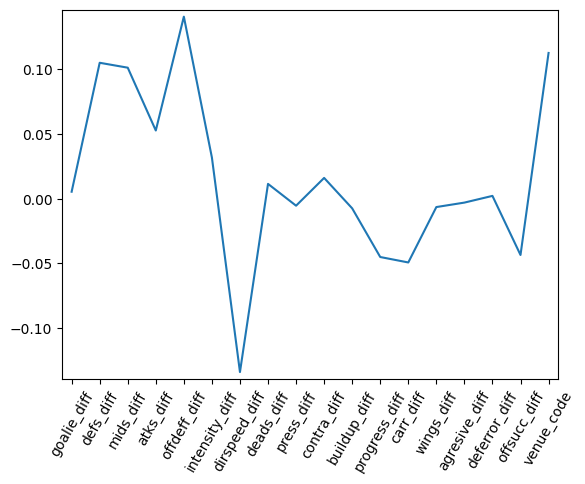

[0.79811383 0.78210644 0.77165844 0.76562228 0.78567325]
0.7806348516821535
R^2 on holdout
0.7723837192278835
Test set RMSE: 0.094


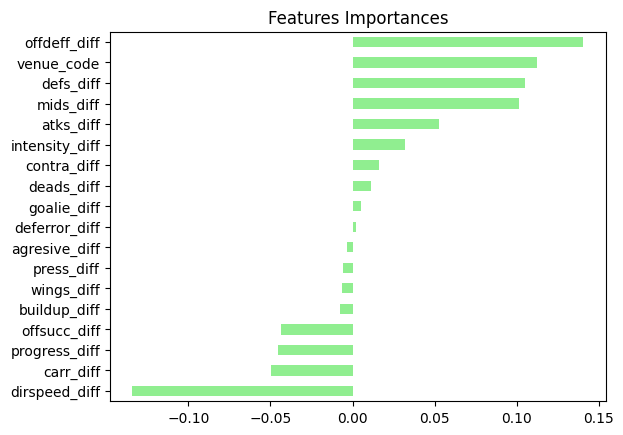

In [194]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
parameters = {'fit_intercept':[True,False],  'copy_X':[True, False]}

model,pred,info=make_predictions_reg(splited,reg,feature_names,scale=False,grid_params=parameters,plot_imp=True)

[('standardscaler', StandardScaler()), ('lasso', Lasso(alpha=0.005))]
[ 0.          0.04144502  0.03412092  0.01654367  0.04810421  0.0073185
 -0.04040046 -0.0035806   0.          0.00461613  0.00473049 -0.00468215
 -0.00450463 -0.00622256 -0.         -0.00489458 -0.          0.05136889]


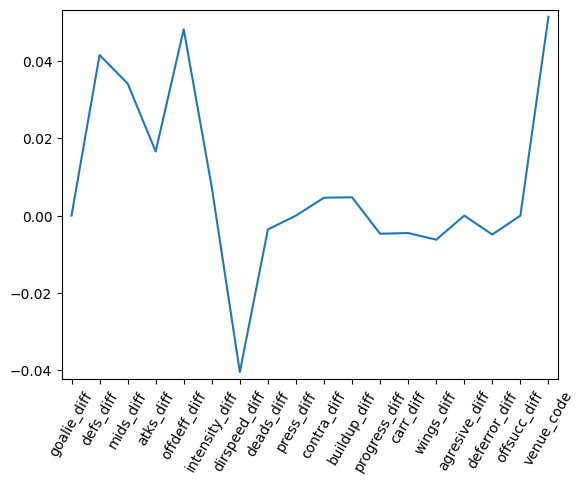

[0.79743287 0.7752291  0.76497202 0.7585614  0.76831108]
0.7729012952133966
R^2 on holdout
0.7719687351493273
Test set RMSE: 0.094


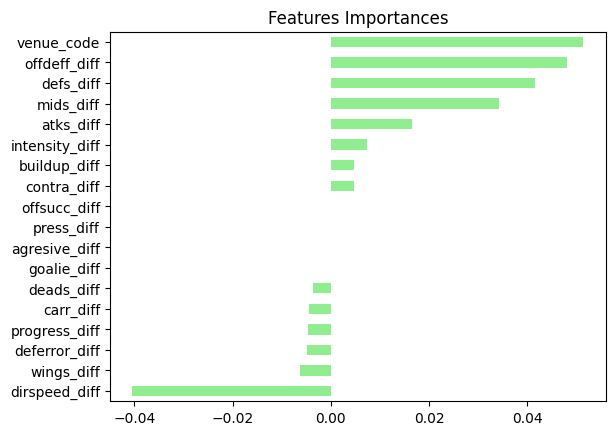

In [195]:
from sklearn.linear_model import Lasso
reg = Lasso(alpha=0.005)

model,pred,info=make_predictions_reg(splited,reg,feature_names,scale=True,grid_params=None,plot_imp=True)

[('standardscaler', StandardScaler()), ('ridge', Ridge(alpha=0.11))]
[ 0.00226269  0.0436346   0.04137353  0.02013084  0.06086164  0.01308749
 -0.05462556  0.00469463 -0.00235159  0.00647497 -0.00315496 -0.01912885
 -0.02099742 -0.00275459 -0.00129385  0.0008627  -0.01795403  0.05629528]


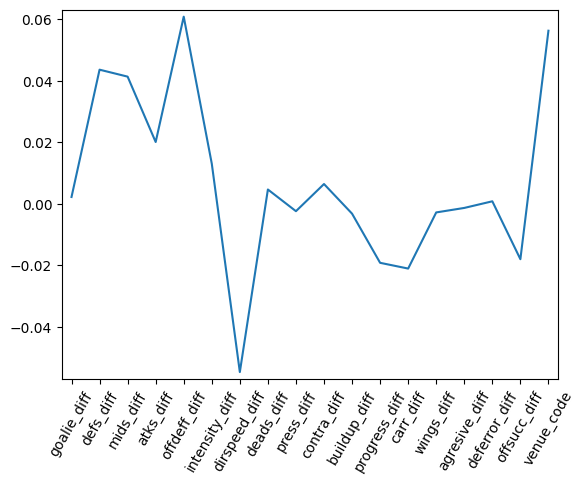

[0.79812821 0.78210452 0.771655   0.76562377 0.78567068]
0.7806364337427978
R^2 on holdout
0.772387922127836
Test set RMSE: 0.094


In [196]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=0.11)

model,pred,info=make_predictions_reg(splited,reg,feature_names,scale=True,grid_params=None)

[('standardscaler', StandardScaler()), ('elasticnet', ElasticNet(alpha=0.01, l1_ratio=0.6))]
[ 0.          0.0406961   0.03442135  0.01665615  0.04468095  0.00908472
 -0.03540986 -0.00760827  0.          0.00370666  0.00560589 -0.0012785
 -0.00079067 -0.00562129 -0.         -0.00579056 -0.          0.05016804]


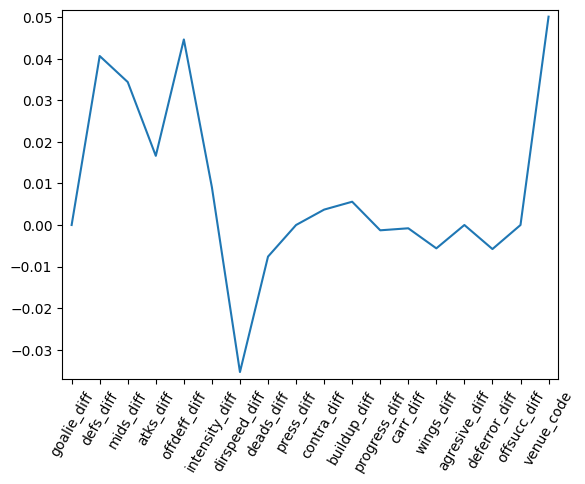

[0.79567037 0.7729903  0.76256736 0.75581995 0.76458914]
0.770327424428403
R^2 on holdout
0.7703625166935144
Test set RMSE: 0.094


In [197]:
from sklearn.linear_model import ElasticNet
reg = ElasticNet(l1_ratio=0.6, alpha=0.01)

model,pred,info=make_predictions_reg(splited,reg,feature_names,scale=True,grid_params=None)

[('standardscaler', StandardScaler()), ('elasticnet', ElasticNet())]


c:\Users\krawc\OneDrive\Documents\code\pythons\predictor\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.330e+01, tolerance: 7.168e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\Users\krawc\OneDrive\Documents\code\pythons\predictor\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+01, tolerance: 7.096e-03 Linear regression models with null weight for the l1 regularization term are m

[ 0.00438878  0.02305412  0.0209884   0.01306008  0.02456243  0.01556591
 -0.01817979 -0.0165467   0.00954714  0.00899572  0.01465321 -0.00189124
 -0.00154245 -0.0048555  -0.00092022 -0.01319779  0.00700611  0.02822369]


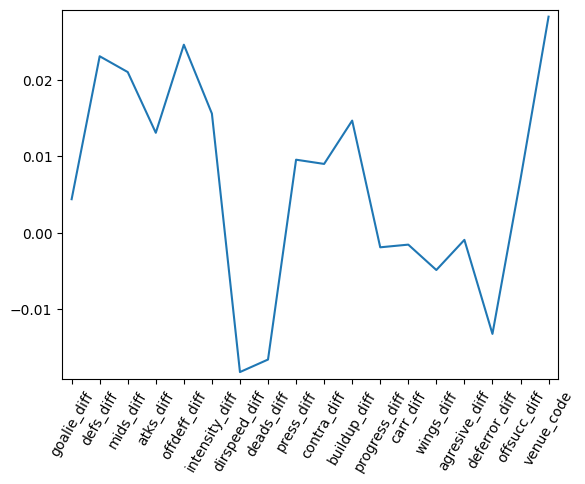

c:\Users\krawc\OneDrive\Documents\code\pythons\predictor\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.330e+01, tolerance: 7.168e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\Users\krawc\OneDrive\Documents\code\pythons\predictor\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+01, tolerance: 7.096e-03 Linear regression models with null weight for the l1 regularization term are m

[0.75555713 0.72679091 0.72015561 0.71762301 0.72572248]
0.7291698274408307
R^2 on holdout
0.7340191317127711
Test set RMSE: 0.102


c:\Users\krawc\OneDrive\Documents\code\pythons\predictor\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.278e+01, tolerance: 7.022e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\Users\krawc\OneDrive\Documents\code\pythons\predictor\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.317e+01, tolerance: 7.220e-03 Linear regression models with null weight for the l1 regularization term are m

In [198]:
from sklearn.linear_model import ElasticNet
reg = ElasticNet()
parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}

model,pred,info=make_predictions_reg(splited,reg,feature_names,scale=True,grid_params=parameters)

[0.66357577 0.68556046 0.63652547 0.61892268 0.62369993]
0.6456568607474805
R^2 on holdout
0.6348389689991956
Test set RMSE: 0.119


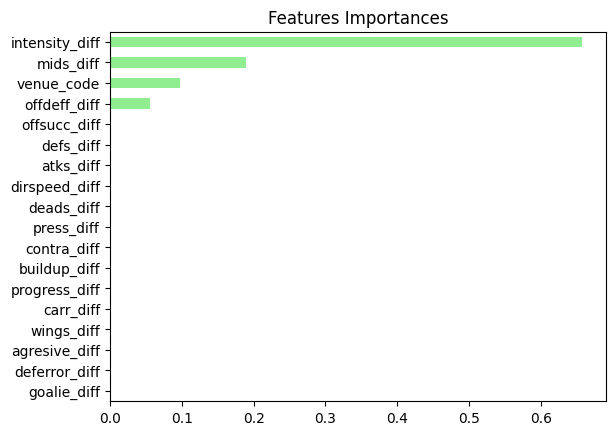

In [199]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=7, min_samples_leaf=0.05, random_state=3)

model,pred,info=make_predictions_reg(splited,reg,feature_names,scale=False,grid_params=None,plot_imp=True)


c:\Users\krawc\OneDrive\Documents\code\pythons\predictor\.venv\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\krawc\OneDrive\Documents\code\pythons\predictor\.venv\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\krawc\OneDrive\Documents\code\pythons\predictor\.venv\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\krawc\OneDrive\Documents\code\pythons\predictor\.venv\Lib\site-packages\s

[0.81433204 0.79215124 0.7682157  0.74960731 0.7603528 ]
0.7769318171657117
R^2 on holdout
0.7730722483779418
Test set RMSE: 0.094


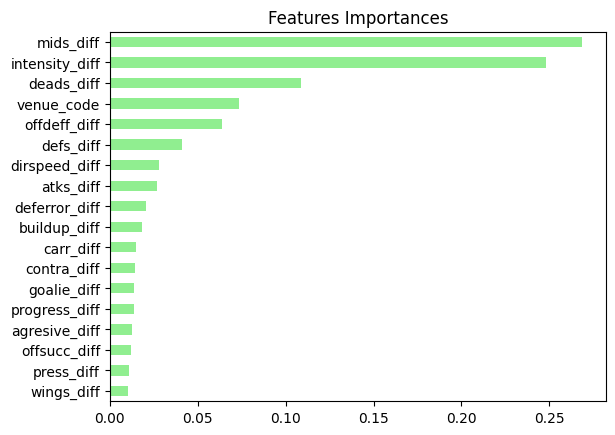

In [200]:
# Random Forests
from sklearn.ensemble import RandomForestRegressor
# Instantiate rf
reg = RandomForestRegressor(n_estimators=100, random_state=2)

model,pred,info=make_predictions_reg(splited,reg,feature_names,scale=False,grid_params=None,plot_imp=True)


c:\Users\krawc\OneDrive\Documents\code\pythons\predictor\.venv\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


c:\Users\krawc\OneDrive\Documents\code\pythons\predictor\.venv\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\krawc\OneDrive\Documents\code\pythons\predictor\.venv\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\krawc\OneDrive\Documents\code\pythons\predictor\.venv\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\krawc\OneDrive\Documents\code\pythons\predictor\.venv\Lib\site-packages\sklearn\ensemble\_gb.p

[0.82005866 0.80768809 0.78272915 0.77137061 0.78145465]
0.792660232743092
R^2 on holdout
0.797660211190852
Test set RMSE: 0.089


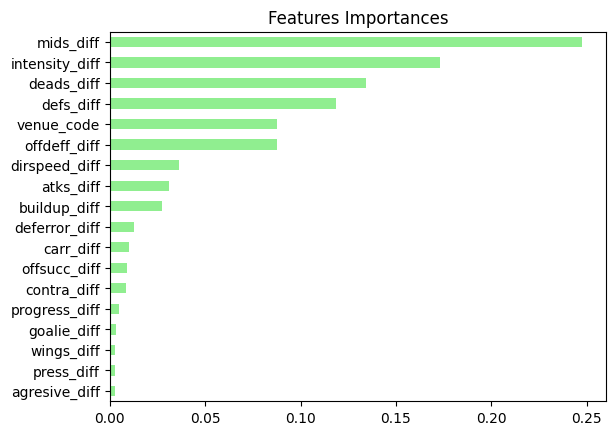

In [201]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
# Instantiate gb
reg = GradientBoostingRegressor(max_depth=3,n_estimators=200,random_state=2)

model,pred,info=make_predictions_reg(splited,reg,feature_names,scale=False,grid_params=None,plot_imp=True)


c:\Users\krawc\OneDrive\Documents\code\pythons\predictor\.venv\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\krawc\OneDrive\Documents\code\pythons\predictor\.venv\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\krawc\OneDrive\Documents\code\pythons\predictor\.venv\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\krawc\OneDrive\Documents\code\pythons\predictor\.venv\Lib\site-packages\sklearn\ensemble\_gb.p

[0.8331098  0.81882258 0.79224764 0.76877636 0.79670201]
0.8019316778059803
R^2 on holdout
0.8131110015456862
Test set RMSE: 0.085


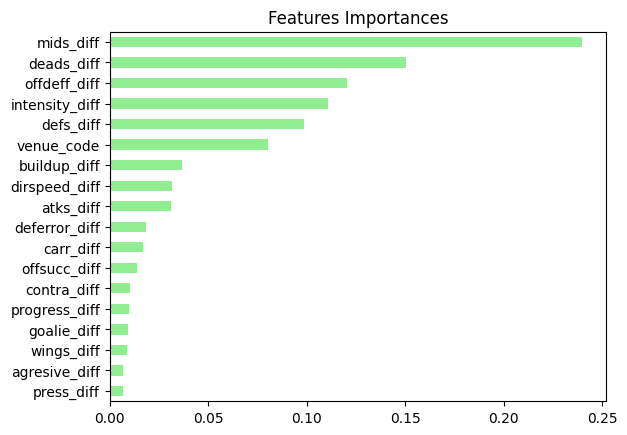

In [8]:
#Stochastic Gradient Boosting (SGB)
from sklearn.ensemble import GradientBoostingRegressor
# Instantiate sgbr
reg = GradientBoostingRegressor(max_depth=4, 
                                 subsample=0.8,
                                 max_features=0.4,
                                 n_estimators=200,                                
                                 random_state=2)

model,pred,info=make_predictions_reg(splited,reg,feature_names,scale=False,grid_params=None,plot_imp=True)


In [9]:
# export_model(clf,'modelname')

fin=append_preds(full_w_outs[['target']+cols_base],full_w_outs,feature_names,model)
fin
# fin.to_csv('match_w_pred_2223diff_trsh4s.csv')

,target,opponent,team,date,time,round,day,venue,result,gf,ga,venue_code,pAvgH,y_pred
key,,,,,,,,,,,,,,
2019-09-22 Aston Villa-Arsenal,0,Arsenal,Aston Villa,2019-09-22,16:30:00,Matchweek 6,Sun,Away,L,2,3,0,0.116521,0.165278
2020-07-21 Aston Villa-Arsenal,1,Arsenal,Aston Villa,2020-07-21,20:15:00,Matchweek 37,Tue,Home,W,1,0,1,0.298980,0.248546
2019-10-06 Bournemouth-Arsenal,0,Arsenal,Bournemouth,2019-10-06,14:00:00,Matchweek 8,Sun,Away,L,0,1,0,0.131342,0.203566
2019-12-26 Bournemouth-Arsenal,0,Arsenal,Bournemouth,2019-12-26,15:00:00,Matchweek 19,Thu,Home,D,1,1,1,0.277579,0.309651
2019-12-05 Brighton-Arsenal,1,Arsenal,Brighton,2019-12-05,20:15:00,Matchweek 15,Thu,Away,W,2,1,0,0.167988,0.169616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-11 Southampton-Wolves,0,Wolves,Southampton,2023-02-11,15:00:00,Matchweek 23,Sat,Home,L,1,2,1,0.308904,0.406798
2022-08-20 Tottenham-Wolves,1,Wolves,Tottenham,2022-08-20,12:30:00,Matchweek 3,Sat,Home,W,1,0,1,0.687707,0.627814
2023-03-04 Tottenham-Wolves,0,Wolves,Tottenham,2023-03-04,15:00:00,Matchweek 26,Sat,Away,L,0,1,0,0.423168,0.488622


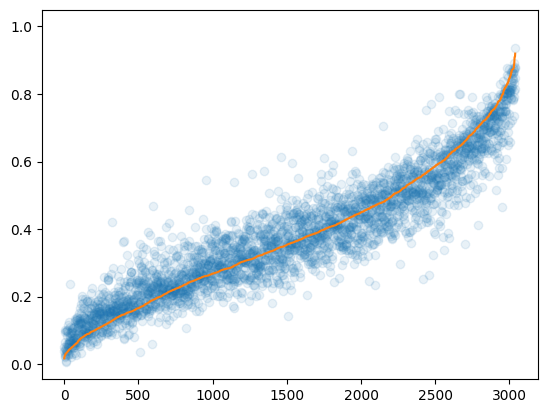

In [10]:
compare=fin.iloc[:,-2:].sort_values(fin.columns[-2])

y=compare.iloc[:,0]
y2=compare.iloc[:,1]
x=range(len(y))
plt.plot(1, 1)
# plt.plot(x, y2)
plt.scatter(x, y2, alpha=0.1)
plt.plot(x, y)


# #fit regression to eliminate sigma shape
# # post_reg = LinearRegression()
# # post_reg.fit(np.array(x).reshape(-1, 1), y)
# compare['post_reg_form']=0.043297297487841335+0.00088918*np.array(x)
# # post_reg.fit(np.array([x[0],x[-1]]).reshape(-1, 1), np.array([y.iloc[0],y.iloc[-1]]).reshape(-1, 1))
# compare['post_reg_form2']=0.01722355+0.00118357*np.array(x)
# # full_w_outs['post_reg_form3']=((full_w_outs['post_reg_form2']+full_w_outs['pAvgH'])/2)
# compare['post_reg_form3']=((compare['post_reg_form2']+compare['pAvgH'])/2)
# compare['sto']=np.array(x)/760

# # plt.plot(x, compare['post_reg_form'])
# # plt.plot(x, np.array(x)/760)
# # plt.plot(x, compare['post_reg_form2'])
# plt.plot(x, compare['post_reg_form3'])

# # full_w_outs=full_w_outs.join(compare['post_reg_form'])
# # full_w_outs=full_w_outs.join(compare['sto'])
# # full_w_outs=full_w_outs.join(compare['post_reg_form2'])


In [11]:
fin.loc[fin.y_pred<0]=0
fin.loc[fin.y_pred>1]=1

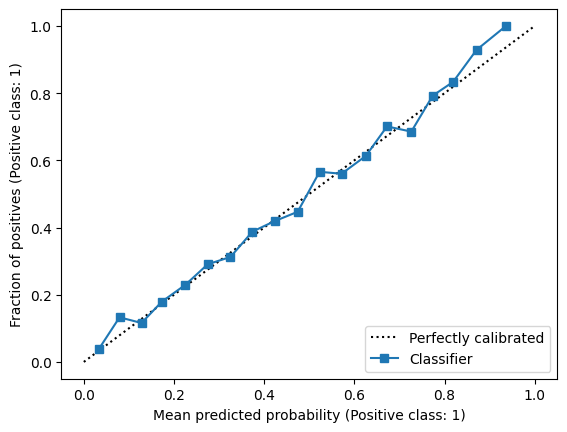

In [12]:

from sklearn.calibration import CalibrationDisplay
CalibrationDisplay.from_predictions(fin.target, fin.y_pred,n_bins=20)

#model oparty o metrics z labelami Pinacle, vs prawdziwy rozklad zwycieztw

In [13]:
# from sklearn.preprocessing import MinMaxScaler
# # data = np.array([2,4,5,9]).reshape(-1, 1)
# scaler = MinMaxScaler()
# full_w_outs['pAvgH']=scaler.fit_transform(full_w_outs[['pAvgH']])

In [14]:
# full_w_outs.loc[:,'pAvgH']=full_w_outs.loc[:,'pAvgH'].map(lambda x:x*0.9 if x>0.8 else x)
# full_w_outs.loc[:,'pAvgH']=full_w_outs.loc[:,'pAvgH'].map(lambda x:x*1.1 if x<0.08 else x)

In [15]:
# full_w_outs=full_w_outs[full_w_outs.loc[:,'pAvgH'].between(0.1,0.8)]

In [21]:
def bin_total(y_prob, n_bins):
    bins = np.linspace(0., 1. + 1e-8, n_bins + 1)

    # In sklearn.calibration.calibration_curve,
    # the last value in the array is always 0.
    binids = np.digitize(y_prob, bins) - 1

    return np.bincount(binids, minlength=len(bins))

inbin=bin_total( fin.iloc[:,-1], n_bins=20)
inbin

array([ 26, 113, 164, 240, 296, 289, 301, 312, 272, 235, 205, 150, 137,
       107,  89,  53,  36,  14,   1,   0,   0], dtype=int64)

In [32]:
bin_bounds=np.linspace(0., 1. + 1e-8, 20 + 1)
bin_bounds[1:]

array([0.05      , 0.1       , 0.15      , 0.2       , 0.25      ,
       0.3       , 0.35      , 0.4       , 0.45      , 0.5       ,
       0.55000001, 0.60000001, 0.65000001, 0.70000001, 0.75000001,
       0.80000001, 0.85000001, 0.90000001, 0.95000001, 1.00000001])

In [52]:
for i,bound in enumerate(bin_bounds[:-1]):
    start=round(bin_bounds[i],2)
    end=round(bin_bounds[i+1],2)
    mid=round((start+((end-start)/2))*100,3)
    
    c1=fin['y_pred'].between(start,end)
    fin.loc[c1,'bin']=mid

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.scatterplot(x=x,y="y_pred",hue="bin",data=compare.reset_index(),palette="Paired")

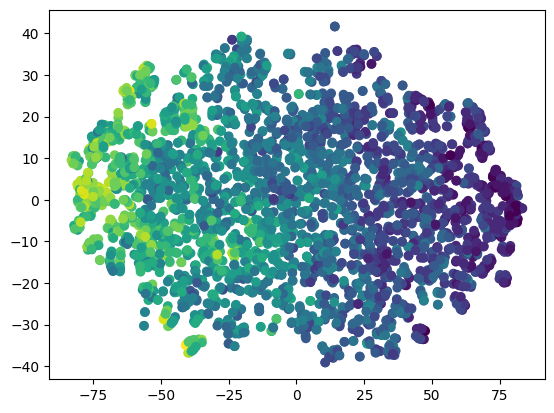

In [74]:
def plot_tsne(X_train,y_train):

    # Import TSNE
    from sklearn.manifold import TSNE

    # Create a TSNE instance: model
    model = TSNE(learning_rate=100)
    # Apply fit_transform to samples: tsne_features
    tsne_features = model.fit_transform(X_train)

    # Select the 0th feature: xs
    xs = tsne_features[:,0]
    # Select the 1st feature: ys
    ys = tsne_features[:,1]

    # Scatter plot, coloring by variety_numbers
    plt.scatter(xs,ys,c=y_train)
    plt.show()
plot_tsne(X,fin.bin)

,goalie_diff,defs_diff,mids_diff,atks_diff,offdeff_diff,intensity_diff,dirspeed_diff,deads_diff,press_diff,contra_diff,buildup_diff,progress_diff,carr_diff,wings_diff,agresive_diff,deferror_diff,offsucc_diff,venue_code
PC1,-0.143694,-0.283053,-0.325158,-0.198349,-0.250254,-0.347137,0.262049,0.337101,-0.290980,-0.203808,-0.316360,0.072079,0.009716,0.259223,-0.044507,0.150293,-0.255692,-3.697807e-13
PC2,0.242161,0.135806,0.056809,-0.128324,0.318647,-0.033608,0.292383,0.006175,0.081400,-0.221414,-0.171428,0.464519,-0.578912,0.110434,0.018112,-0.161309,0.201320,6.350709e-09
PC3,0.211615,0.115723,-0.097920,-0.083282,0.196881,0.023085,-0.202901,-0.141962,-0.326703,-0.374969,-0.004838,-0.203855,0.249459,0.296136,-0.475114,-0.385258,0.108103,4.677729e-09


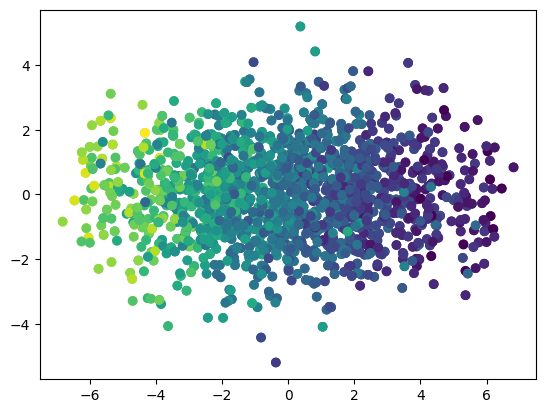

In [69]:
def plot_pca(X_train,y_train,n_components=3):
    # how many intrinsic dimensions you have to set n_components - idealy to intrinsic dimention


    from sklearn.decomposition import PCA

    # Create scaler: scaler
    scaler = StandardScaler()
    # Create a PCA instance: pca
    if n_components:
        pca = PCA(n_components=n_components)
    else:
        pca = PCA()

    # Create pipeline: pipeline
    pipeline = make_pipeline(scaler,pca)
    # Fit the pipeline to 'samples'
    pipeline.fit(X_train)

    # Transform the scaled samples: pca_features
    pca_features = pipeline.transform(X_train)


    # # Plot the explained variances
    # features = range(pca.n_components_)
    # plt.bar(features, pca.explained_variance_)
    # plt.xlabel('PCA feature')
    # plt.ylabel('variance')
    # plt.xticks(features)
    # plt.show()

    # # Print the shape of pca_features
    # print(X_train.shape)
    # print(pca_features.shape)

    # This information is included in the pca attribute: components_. As described in the documentation, 
    # pca.components_ outputs an array of [n_components, n_features], 
    # so to get how components are linearly related with the different features you have to:
    #wychodzi na to ze PC sa skorelowane z kazdym feature i sa ich oszacowaniem, wiec nie wiadomo z ktorego zrezygnowac
    # Dump components relations with features:
    display(pd.DataFrame(pca.components_,columns=feature_names,index = [f'PC{x}' for x in range(1,n_components+1)]))

    # Select the 0th feature: xs
    xs = pca_features[:,0]
    # Select the 1st feature: ys
    ys = pca_features[:,1]
    # Scatter plot, coloring by variety_numbers
    plt.scatter(xs,ys,c=y_train)
    plt.show()
    
plot_pca(X,fin.bin)

In [299]:
bin_lbl=27.5
bin_x=X[fin.bin==bin_lbl]
bin_x=bin_x.drop('venue_code',axis=1)
bin_y=fin.bin[fin.bin==bin_lbl]

In [300]:
# plot_pca(bin_x,bin_y)


In [301]:
# plot_tsne(bin_x,bin_y)

In [317]:
# Import KMeans
from sklearn.cluster import KMeans
# Create a KMeans instance with 3 clusters: model
km = KMeans(n_clusters=4)

# Fit model to points
km.fit(bin_x)

# Determine the cluster labels of new_points: labels
bin_x['km_labels'] = km.predict(bin_x)

# Print cluster labels of new_points
# print(km_labels)

c:\Users\krawc\OneDrive\Documents\code\pythons\predictor\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


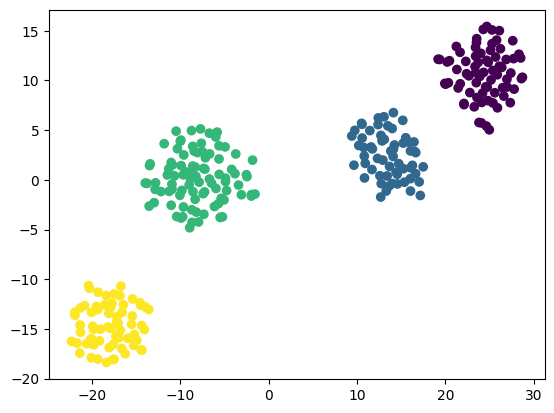

In [303]:
plot_tsne(bin_x,bin_x['km_labels'])

In [310]:
print(bin_lbl)
# print((bin_x.venue_code==bin_x.km_labels).mean())
bin_x.join(full_w_outs['target']).groupby('km_labels').mean()['target']

27.5


km_labels
0    0.219178
1    0.300000
2    0.296703
3    0.353846
Name: target, dtype: float64

In [319]:
# process all
all_bins=sorted(set(fin.bin))

df_mix=[]
for bin_lbl in all_bins:
    try:
        bin_x=X[fin.bin==bin_lbl]
        bin_x=bin_x.drop('venue_code',axis=1)
        bin_x['km_labels'] = km.fit_predict(bin_x)

        true_proba=bin_x.join(full_w_outs['target']).groupby('km_labels').mean()['target']
        true_proba_dict=true_proba.to_dict()
        bin_x['km_labels']=bin_x.km_labels.map(true_proba_dict)
        df_mix.append(bin_x)
    except:
            bin_x=X[fin.bin==bin_lbl]
            bin_x=bin_x.drop('venue_code',axis=1)
            bin_x['km_labels'] = bin_lbl/100
            
out=pd.concat(df_mix)['km_labels']

misssing=set(fin.y_pred.index)-set(out.index)
out[list(misssing)[0]]=fin.y_pred[list(misssing)[0]]

out

c:\Users\krawc\OneDrive\Documents\code\pythons\predictor\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\krawc\OneDrive\Documents\code\pythons\predictor\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\krawc\OneDrive\Documents\code\pythons\predictor\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\krawc\OneDrive\Documents\code\pythons\predictor\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\krawc\OneDrive\Documents\code\pythons\predictor\.ven

In [305]:
bin_x.corr()['km_labels'].sort_values(ascending=False,key=lambda x:abs(x))[:8]

km_labels        1.000000
press_diff      -0.608024
mids_diff       -0.471251
wings_diff       0.395088
agresive_diff   -0.359847
contra_diff     -0.337674
progress_diff   -0.302465
carr_diff        0.292606
Name: km_labels, dtype: float64

In [306]:
# pd.plotting.scatter_matrix(bin_x,c=bin_x['km_labels'],marker='D',figsize=[13,13])
# # plt.xticks(rotation='vertical')
# plt.show()

In [307]:
# import seaborn as sns
# sns.heatmap(bin_x.corr(), square=True, cmap='RdYlGn')

In [308]:
# # tmp display labeled
# c_label=bin_x.km_labels==3
# fullkey=pd.DataFrame(y).join(pd.DataFrame(c_label)).fillna(False)['km_labels']

# compare=fin.iloc[:,-3:].sort_values(fin.columns[-3])
# y=compare.iloc[:,0]
# y2=compare.iloc[:,1]
# x=np.array(range(len(y)))
# plt.plot(1, 1)
# plt.scatter(x, y2, alpha=0.1)
# plt.scatter(x[fullkey], y2[fullkey], alpha=0.8)
# plt.plot(x, y)



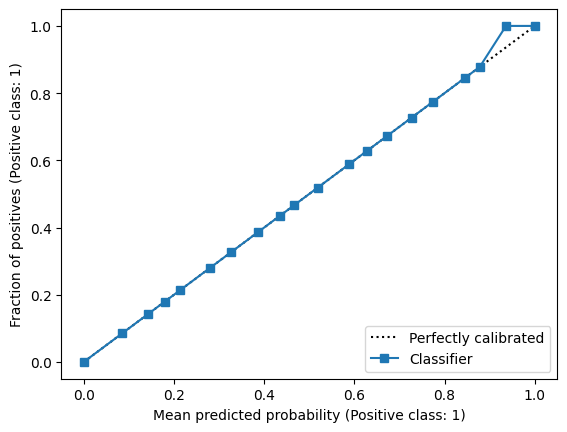

In [352]:
fin2=fin.join(out)

from sklearn.calibration import CalibrationDisplay
CalibrationDisplay.from_predictions(fin2.target, fin2.km_labels,n_bins=20)

,target,opponent,team,date,time,round,day,venue,result,gf,ga,venue_code,pAvgH,y_pred,bin,km_labels
key,,,,,,,,,,,,,,,,
2019-09-22 Aston Villa-Arsenal,0,Arsenal,Aston Villa,2019-09-22,16:30:00,Matchweek 6,Sun,Away,L,2,3,0,0.116521,0.165278,17.5,0.231884
2020-07-21 Aston Villa-Arsenal,1,Arsenal,Aston Villa,2020-07-21,20:15:00,Matchweek 37,Tue,Home,W,1,0,1,0.298980,0.248546,22.5,0.319444
2019-10-06 Bournemouth-Arsenal,0,Arsenal,Bournemouth,2019-10-06,14:00:00,Matchweek 8,Sun,Away,L,0,1,0,0.131342,0.203566,22.5,0.319444
2019-12-26 Bournemouth-Arsenal,0,Arsenal,Bournemouth,2019-12-26,15:00:00,Matchweek 19,Thu,Home,D,1,1,1,0.277579,0.309651,32.5,0.343750
2019-12-05 Brighton-Arsenal,1,Arsenal,Brighton,2019-12-05,20:15:00,Matchweek 15,Thu,Away,W,2,1,0,0.167988,0.169616,17.5,0.231884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-11 Southampton-Wolves,0,Wolves,Southampton,2023-02-11,15:00:00,Matchweek 23,Sat,Home,L,1,2,1,0.308904,0.406798,42.5,0.344262
2022-08-20 Tottenham-Wolves,1,Wolves,Tottenham,2022-08-20,12:30:00,Matchweek 3,Sat,Home,W,1,0,1,0.687707,0.627814,62.5,0.758621
2023-03-04 Tottenham-Wolves,0,Wolves,Tottenham,2023-03-04,15:00:00,Matchweek 26,Sat,Away,L,0,1,0,0.423168,0.488622,47.5,0.442623
